### What we often do in this use-case
    High level over-view..
    
    a)We will try to solve same problem statements from various perspective(from beginners(frshers) point of view 
    & ofcourse from experienced folks) which will help u to gain coding skills & helps u in building logics.. & this 
    will cover lots of students & working professional from wide spectrum..
    
    Again if u r fresher  , kindly focus more on freshers approach  , ofcourse u can continue with optimal code
    (experienced folks) , as writing  optimal code will definitely help u in long run..
    
   
    b)We will solve most of those challenges that we often face in real world..
    
    c)we will focus primarily on each & every part of data science life-cycle..
    
    
    a)Data collection
    b)Perform Data Cleaning 
    c)perform featurization or feature engineering
    d)Data visuaslisation(EDA)
    e)Feature encoding
    f)checking outliers & impute it..
    g)Feature selection or feature importance
    h)build machine leaning model & dump it..
    i)hypertune ml model..along with cross validation
    j)Interpretation of ml model using Explainable AI like shap , lime
    j)how to build pipeline(basic pipeline) & advacnced pipeline
    

### meaning of various times in jupyter notebook(Ipython notebook) output

In [111]:
### getting above info is pretty good for experineced folks as u can expect such questions on internals of programming as well.

In [112]:
### so if i will use %%time or %time before huge block of code , we will get such various times..

In [113]:
%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Wall time: 0 ns


#### If u want to implement pipelines , 
### follow file-->>  Projects_need_to_explore_OOPs_Pipeline.txt from G drive

In [114]:
pd.__version__

'1.2.4'

In [115]:
import sys
sys.version

'3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]'

#### Statiscal analysis for flight price(completely new )-- https://www.kaggle.com/ananyanandi02/statistical-analysis-eda-for-flight-fare

#### Importing dataset
    1.Since data is in form of excel file we have to use pandas read_excel to load the data
    2.After loading it is important to check null values in a column or a row
    3.If it is present then following can be done,
        a.Filling NaN values with mean, median and mode using fillna() method
        b.If Less missing values, we can drop it as well


In [116]:
### This is a question that usually appears in interviews that how to read files without using pandas..

In [117]:
train_data=pd.read_excel('E:\End-2-end Projects\Flight_Price/Data_Train.xlsx')

In [118]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [119]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [120]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [121]:
train_data.shape

(10683, 11)

In [122]:
### getting percentage of the missing values in all feature
train_data.isnull().sum()/len(train_data)*100

## train_data.isnull().mean()*100

Airline            0.000000
Date_of_Journey    0.000000
Source             0.000000
Destination        0.000000
Route              0.009361
Dep_Time           0.000000
Arrival_Time       0.000000
Duration           0.000000
Total_Stops        0.009361
Additional_Info    0.000000
Price              0.000000
dtype: float64

In [123]:
### getting all the rows where we have missing value
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


#### as less missing values,I can directly drop these

In [124]:
train_data.dropna(inplace=True)

In [125]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [126]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [127]:
train_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [128]:
data=train_data.copy()

#### From description we can see that Date_of_Journey is a object data type,
     Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction,bcz our 
     model will not be able to understand Theses string values,it just understand Time-stamp
    For this we require pandas to_datetime to convert object data type to datetime dtype.


    dt.day method will extract only day of that date
    dt.month method will extract only month of that date

In [129]:
'''
def change_into_datetime(col):
    train_data[col]=pd.to_datetime(train_data[col])
    '''

'\ndef change_into_datetime(col):\n    train_data[col]=pd.to_datetime(train_data[col])\n    '

In [130]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [131]:
def change_dtype(col,new_dtype=None):
    '''
    Parameters:----
    
    col = data-type of feature that u have to modify
    
    new_dtype = new_data type that u wish to assign to col
    new_dtype = ['datetime','integer']
    
    
    '''
    
    
    if new_dtype=='datetime':
        data[col]=pd.to_datetime(data[col])
        
    elif new_dtype=='integer':
        data[col]=pd.to_numeric(data[col])

In [132]:
change_dtype('Date_of_Journey','datetime')

In [133]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

### lets do Feature Engineering & fetch some important features..

In [134]:
## 1..baby approach  ( directly using date-time module)
## 2..just define own custom functions..
## 3..using map  ( ie define function apply function on top of data)
#   ie , map(func ,seq)


## 4..using lambda            Assignment questions)


## 5.. using splitting of date , 
# if your Date_of_Journey feature is not a date-time or if it belongs to string nature..u can think of using your split function
# but again thats not a handy way , bcz if we u have different formats of date , it will not be handy...

In [135]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


#### 1..baby approach 

In [136]:
data['Journey_day']=data['Date_of_Journey'].dt.day

In [137]:
data['Journey_month']=data['Date_of_Journey'].dt.month

In [138]:
data['Journey_year']=data['Date_of_Journey'].dt.year

In [139]:
data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,2019


In [140]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,2019


#### 2..just define own custom functions..

#### in date-time , we have 2 data-type (datetime64[ns]) and (<M8[ns])
    datetime64[ns] is a general dtype, while <M8[ns] is a specific dtype , ns is basicaly nano second..
    Both are similar , it entirely how your numpy was compiled..

In [141]:
np.dtype('datetime64[ns]') == np.dtype('<M8[ns]')

True

In [142]:
### ie I will pass any feature to this below function , it will return day , month , year from this..

In [143]:
'''
def fetch_dt_att(dataframe,feature):
    try:
        if dataframe[feature].dtype=='<M8[ns]' or 'datetime64[ns]' :
            return pd.Series([dataframe[feature].dt.day,dataframe[feature].dt.month,dataframe[feature].dt.year])
    except:
        ## to_datetime will parse the dates, which are currently coded as strings, into datetime format
        dataframe[feature]=pd.to_datetime(dataframe[feature])
        return pd.Series([dataframe[feature].dt.day,dataframe[feature].dt.month,dataframe[feature].dt.year])
'''

"\ndef fetch_dt_att(dataframe,feature):\n    try:\n        if dataframe[feature].dtype=='<M8[ns]' or 'datetime64[ns]' :\n            return pd.Series([dataframe[feature].dt.day,dataframe[feature].dt.month,dataframe[feature].dt.year])\n    except:\n        ## to_datetime will parse the dates, which are currently coded as strings, into datetime format\n        dataframe[feature]=pd.to_datetime(dataframe[feature])\n        return pd.Series([dataframe[feature].dt.day,dataframe[feature].dt.month,dataframe[feature].dt.year])\n"

In [144]:
## df[['Journey_day','Journey_month','Journey_year']]=fetch_dt_att(data,'Date_of_Journey')

In [145]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month',
       'Journey_year'],
      dtype='object')

#### 3..Using map

In [146]:
def fetch_dt_att2(x):
    return ([x.day,x.month,x.year])


In [147]:
### before applying above function , make sure it must be of date-time nature..
data['Date_of_Journey'].dtype

dtype('<M8[ns]')

In [148]:
# data[['Journey_day','Journey_month','Journey_year']]=pd.DataFrame(map(fetch_dt_att2,data['Date_of_Journey'])).rename(columns={0:'day',1:'month',2:'year'})

In [149]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,2019


#### 4..using lambda

In [150]:
'''
data['Date_of_Journey'].apply(lambda x:x.year)
data['Date_of_Journey'].apply(lambda x:x.month)
data['Date_of_Journey'].apply(lambda x:x.day)

'''

"\ndata['Date_of_Journey'].apply(lambda x:x.year)\ndata['Date_of_Journey'].apply(lambda x:x.month)\ndata['Date_of_Journey'].apply(lambda x:x.day)\n\n"

#### 5.. using splitting of date

In [151]:
## if your Date_of_Journey feature is not a date-time or if it belongs to string nature..u can think of using your split function
# but again thats not a handy way , bcz if we u have different formats of date ,ie DD/MM/YY , MM/DD/YY  , MM-DD-YYYY etc.. 
# it will not be handy...

'''

### https://www.kaggle.com/tanvikurade/flight-ticket-prediction-eda-model

data['Journey_day']=data['Date_of_Journey'].str.split('/').str[0]
### data['Journey_day']=data['Date_of_Journey'].apply(lambda x:x.split('/')[0])

data['Journey_month']=data['Date_of_Journey'].str.split('/').str[1]
### data['Journey_month']=data['Date_of_Journey'].apply(lambda x:x.split('/')[1])

data['Journey_year']=data['Date_of_Journey'].str.split('/').str[2]
### data['Journey_year']=data['Date_of_Journey'].apply(lambda x:x.split('/')[2])

'''

### but if my Date_of_Journey has multiple formats of date ie DD/MM/YY , MM/DD/YY  , MM-DD-YYYY etc.. 
### then above approach will not be handy

"\n\n### https://www.kaggle.com/tanvikurade/flight-ticket-prediction-eda-model\n\ndata['Journey_day']=data['Date_of_Journey'].str.split('/').str[0]\n### data['Journey_day']=data['Date_of_Journey'].apply(lambda x:x.split('/')[0])\n\ndata['Journey_month']=data['Date_of_Journey'].str.split('/').str[1]\n### data['Journey_month']=data['Date_of_Journey'].apply(lambda x:x.split('/')[1])\n\ndata['Journey_year']=data['Date_of_Journey'].str.split('/').str[2]\n### data['Journey_year']=data['Date_of_Journey'].apply(lambda x:x.split('/')[2])\n\n"

In [152]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,2019


In [153]:
### we have all the data of 2019 year thats why it makes no sense to consider this feature as a input to my machine learning model,
### but ya , if we have more than 1 year , ofcourse it makes sense

data['Journey_year'].unique()

array([2019], dtype=int64)

### Lets try to clean  Arrival_Time & Dep_Time  & featurize it..
    bcz our ml_model is not able to understand that arrival time is 22;20 as its a string data
    so we will say to our model hey this is arrival hour  , this is arrival minute 
    bcz ml_model is only about mathematics & mathematics works only with numbers

#### we will clean & featurize it 
    a) considering beginners(freshers) students point of view & 
    b) of-course for experienced folks, we will try to write optimized code.. 
        (using list comprehension , custom functions , lambda & map )


### a) considering beginners(freshers) students point of view
        1..using split()
        2..using date-time approach

#### 1..using split()

In [154]:
## make sure Arrival_time must be of string nature..

In [155]:
### imagine we have arival time as ' 22:20 07 March' ,thats why very first we have to remove xtra spaces..

train_data['Arrival_Time'][0].strip().split(' ')[0]

'01:10'

In [156]:

### access hour 
train_data['Arrival_Time'][0].strip().split(' ')[0].split(':')[0]

'01'

In [157]:

### access mins
train_data['Arrival_Time'][0].strip().split(' ')[0].split(':')[1]

'10'

In [158]:
#### now lets convert this hour into integer format

In [159]:
int(train_data['Arrival_Time'][0].strip().split(' ')[0].split(':')[0])

1

In [160]:
hours=[]
for i in train_data['Arrival_Time'].index:
    hours.append(int(train_data['Arrival_Time'][i].strip().split(' ')[0].split(':')[0]))
    

In [161]:
# train_data['Arrival_Time_hours']=hours

In [162]:
train_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


##### 2..using date-time approach

In [163]:
## make sure Arrival_time must be of date-time nature..
change_dtype('Arrival_Time','datetime')

In [164]:
data['Arrival_Time_hour']=data['Arrival_Time'].dt.hour
data['Arrival_Time_minute']=data['Arrival_Time'].dt.minute
      

In [165]:
data.dtypes

Airline                        object
Date_of_Journey        datetime64[ns]
Source                         object
Destination                    object
Route                          object
Dep_Time                       object
Arrival_Time           datetime64[ns]
Duration                       object
Total_Stops                    object
Additional_Info                object
Price                           int64
Journey_day                     int64
Journey_month                   int64
Journey_year                    int64
Arrival_Time_hour               int64
Arrival_Time_minute             int64
dtype: object

In [166]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,2022-01-02 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,13,15


### b)lets write optimal code..
    1..using List Comprehension
    2..own custom functions.. 
        a.. using split()
        b.. using date-time module
    3..using map
    4..using lambda

#### 1...using List Comprehension

In [167]:
'''
## make sure Arrival_time must be of string nature..
hours=[int(train_data['Arrival_Time'][i].strip().split(' ')[0].split(':')[0]) for i in train_data['Arrival_Time'].index]
mins=[int(train_data['Arrival_Time'][i].strip().split(' ')[0].split(':')[1]) for i in train_data['Arrival_Time'].index]

train_data['Arrival_Time_hours']=hours
train_data['Arrival_Time_mins']=mins

'''

"\n## make sure Arrival_time must be of string nature..\nhours=[int(train_data['Arrival_Time'][i].strip().split(' ')[0].split(':')[0]) for i in train_data['Arrival_Time'].index]\nmins=[int(train_data['Arrival_Time'][i].strip().split(' ')[0].split(':')[1]) for i in train_data['Arrival_Time'].index]\n\ntrain_data['Arrival_Time_hours']=hours\ntrain_data['Arrival_Time_mins']=mins\n\n"

#### 2..own custom functions using split()

In [168]:
#### lets create a function to extract hour , minute from feature & later-on we can delete than feature as it is of no use

In [169]:
## make sure Arrival_time must be of string nature..
def extract_hour_min(df,col):
    df[col+"_hours"]= df[col].apply(lambda x:int(x.strip().split(' ')[0].split(':')[0]))
    df[col+"_minutes"]= df[col].apply(lambda x:int(x.strip().split(' ')[0].split(':')[1]))
    df.drop(col,axis=1,inplace=True)
    return df.head(2)


In [170]:
# extract_hour_min(data,'Arrival_Time')

#### 2(b)..own custom functions using date-time

In [171]:
def extract_hour_dt(df,col):
    df[col]=pd.to_datetime(df[col])
    ## change_dtype('Arrival_Time','datetime')
    
    df[col+"_hour"]=df[col].dt.hour
    df[col+"_minute"]=df[col].dt.minute
    df.drop(col,axis=1,inplace=True)
    return df.head(2)


'''

change_dtype('Arrival_Time','datetime')

def extract_min(df,col):
    df[col+"_minute"]=df[col].dt.minute
    
def extract_hour(df,col):
    df[col+"_hour"]=df[col].dt.hour
    
def drop_column(df,col):
    df.drop(col,axis=1,inplace=True)
    
    
extract_hour(data,'Arrival_Time')
extract_min(data,'Arrival_Time')

'''

'\n\nchange_dtype(\'Arrival_Time\',\'datetime\')\n\ndef extract_min(df,col):\n    df[col+"_minute"]=df[col].dt.minute\n    \ndef extract_hour(df,col):\n    df[col+"_hour"]=df[col].dt.hour\n    \ndef drop_column(df,col):\n    df.drop(col,axis=1,inplace=True)\n    \n    \nextract_hour(data,\'Arrival_Time\')\nextract_min(data,\'Arrival_Time\')\n\n'

In [172]:
# extract_hour_dt(data,'Arrival_Time')

#### 3..using map along with split('')

In [173]:
### lets define a function so that we can apply thus function on each & every row of 'Arrival_Time'..

def extract_hour_min2(row):
    hour=row.strip().split(' ')[0].split(':')[0]
    mins=row.strip().split(' ')[0].split(':')[1]
    return (hour,mins)

In [174]:
pd.Series(map(extract_hour_min2, train_data['Arrival_Time']))

0        (01, 10)
1        (13, 15)
2        (04, 25)
3        (23, 30)
4        (21, 35)
           ...   
10677    (22, 25)
10678    (23, 20)
10679    (11, 20)
10680    (14, 10)
10681    (19, 15)
Length: 10682, dtype: object

In [175]:
np.array(map(extract_hour_min2, train_data['Arrival_Time']))

array(<map object at 0x000001EBF456E160>, dtype=object)

In [176]:
### lets unzip the array..
hour,mins=zip(*np.array(pd.Series(map(extract_hour_min2 , train_data['Arrival_Time']))))

In [177]:
type(hour)

tuple

In [178]:
# data['Arrival_Time_hour']=hour
# data['Arrival_Time_minute']=mins

In [179]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,2022-01-02 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019,4,25


#### 3 (b)..using map along with date-time..

In [180]:
### lets define a function so that we can apply thus function on each & every row of 'Arrival_Time'..

def extract_hour_dt(row):
    hour=row.hour
    mins=row.minute
    return (hour,mins)

In [181]:
## Make sure arrival_time must be of date-time nature..
## train_data['Arrival_Time']=pd.to_datetime(data['Arrival_Time'])

In [182]:
pd.Series(map(extract_hour_dt , data['Arrival_Time'])) 

0         (1, 10)
1        (13, 15)
2         (4, 25)
3        (23, 30)
4        (21, 35)
           ...   
10677    (22, 25)
10678    (23, 20)
10679    (11, 20)
10680    (14, 10)
10681    (19, 15)
Length: 10682, dtype: object

In [183]:
### lets unzip the array..
# hour,mins=zip(*np.array(pd.Series(map(extract_hour_dt,data['Arrival_Time']))))

In [184]:
# data['Arrival_Time_hour']=hour
# data['Arrival_Time_minute']=mins

In [185]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,2022-01-02 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,13,15


#### 4..using lambda

In [186]:
train_data['Arrival_Time'].apply(lambda x:int(x.strip().split(' ')[0].split(':')[0]))
### train_data['Arrival_Time'].str.strip().apply(lambda x:x.split(' ')[0].split(':')[0])

0         1
1        13
2         4
3        23
4        21
         ..
10678    22
10679    23
10680    11
10681    14
10682    19
Name: Arrival_Time, Length: 10682, dtype: int64

### Lets apply extract_hour_min function on Dep_Time
...

In [187]:
# Departure time is when a plane leaves the gate.

extract_hour_min(data,'Dep_Time')

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hours,Dep_Time_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-01-02 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,13,15,5,50


## lets analyse when will most of the flights will take-off

In [188]:
### 1..using function on top of feature / or applying function of each & every observation..
### 2..using lambda 
### 3..using np.where()+

In [189]:
#### Converting the flight Dep_Time into proper time i.e.
# mid_night, morning, afternoon and evening.

def flight_dep_time(x):
    '''
    This function takes the flight Departure time 
    and convert into appropriate format.
    '''
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Eve'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'



<AxesSubplot:>

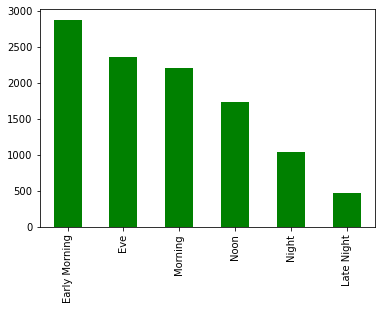

In [190]:
data['Dep_Time_hours'].apply(flight_dep_time).value_counts().plot(kind='bar',color='g')

In [191]:
def flight_dep_time2(row):
    '''
    This function takes the flight Departure time 
    and convert into appropriate format.
    '''
    x=row['Dep_Time_hours']
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Eve'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'


<AxesSubplot:>

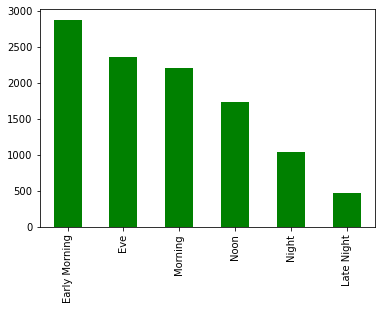

In [192]:
data.apply(flight_dep_time2,axis=1).value_counts().plot(kind='bar',color='g')

In [193]:
'''
def extract_min(df,col):
    df[col+"_minute"]=df[col].dt.minute
    
def extract_hour(df,col):
    df[col+"_hour"]=df[col].dt.hour
    
def drop_column(df,col):
    df.drop(col,axis=1,inplace=True)
      
    
'''

'\ndef extract_min(df,col):\n    df[col+"_minute"]=df[col].dt.minute\n    \ndef extract_hour(df,col):\n    df[col+"_hour"]=df[col].dt.hour\n    \ndef drop_column(df,col):\n    df.drop(col,axis=1,inplace=True)\n      \n    \n'

### Lets Apply pre-processing on duration column,
    -->> Once we pre-processed our Duration feature , lets featurize this feature & extract Duration hours and minute from duration..
    
    -->> As my ML model is not able to understand this duration as it contains string values , thats why we have to tell our
    Ml Model that this is hour & this is minute..

#### lets try to clean duration column 
    a)using line by line code (for freshers & non-IT guyss)
    b)using optimal code (for experienced folks) let say , function  , lambda  , map without lambda , map with lambda...

In [194]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hours,Dep_Time_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-01-02 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,13,15,5,50
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019,4,25,9,25


In [195]:
'2h 50m'.split(' ')

['2h', '50m']

In [196]:
len('2h 50m'.split(' '))

2

In [197]:
duration=list(data['Duration'])

for i in range(len(duration)):
    if len(duration[i].strip().split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:                   # Check if duration contains only hour
            duration[i]=duration[i] + ' 0m'      # Adds 0 minute
            ## duration[i]=duration[i] + ' ' + '0m'
        else:
            duration[i]='0h '+ duration[i]       # if duration contains only second, Adds 0 hour
            ## duration[i]='0h' + ' ' + duration[i]

In [198]:
data['Duration']=duration

In [199]:
'''
def complete(x):
    if 'h' not in x:
        x='0h '+x
    elif 'm' not in x:
        x=x+' 0m'
    return x

train_data['Duration']=train_data['Duration'].apply(complete)

'''

"\ndef complete(x):\n    if 'h' not in x:\n        x='0h '+x\n    elif 'm' not in x:\n        x=x+' 0m'\n    return x\n\ntrain_data['Duration']=train_data['Duration'].apply(complete)\n\n"

In [200]:
#### optimal code to clean duration feature

In [201]:
### lambda syntax for nested-if-else 
### lambda <args> : <return Value> if <condition > else ( <return value > if <condition> else <return value>)


data['Duration'].apply(lambda x:x if len(x.strip().split(' '))==2 else(x+' 0m' if 'h' in duration[i] else '0h ' + x))

### data['Duration'].apply(lambda x:'0h '+x if 'h' not in x else(x+' 0m' if 'm' not in x else x))

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [202]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hours,Dep_Time_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-01-02 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,13,15,5,50
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-06-10 04:25:00,19h 0m,2 stops,No info,13882,6,9,2019,4,25,9,25


#### Now after pre-processing duration feature , my ml_model is not able to understand duration bcz it is string data so any how
#### we have to convert it into numerical(integer of float) values


#### now there are 2  ways to do this..
    a)extract duration_hour & duration_mins from duration feature..
    
    b)convert duration feature into minutes or seconds
      Note-- but it is good to convert it into minutes , then there is a less prob. that we may face cond. of outlier
             But if we convert it into seconds , then we might have huge diff. in values , then we have to use
             feature scaling techniques to order to get rid of outlier issue..

#### a) extract duration_hour & duration_mins from duration feature..

In [203]:
### After Pre-processing , lets featurize this Duration feature to extract Hours & Minutes..

In [204]:
### returns minutes
'2h 50m'.split(' ')[1][0:-1]

'50'

In [205]:
### returns hour
'2h 50m'.split(' ')[0][0:-1]

'2'

In [206]:
type('2h 50m'.split(' ')[0][0:-1])

str

In [207]:
int('2h 50m'.split(' ')[0][0:-1])

2

In [208]:

### lets define that will return us 
def access_hour_min(x):
    hour=int(x.split(' ')[0][0:-1])
    min=int(x.split(' ')[1][0:-1])
    
    ### lets create a column(series) of hour & min so that we can insert it into train_data dataframe..
    return pd.Series([hour , min])


'''
### or we can define 2 separate function for accessing hour Separately & min as well..

def hour(x):
    return x.split(' ')[0][0:-1]

def min(x):
    return x.split(' ')[1][0:-1]
    
    
train_data['Duration_hours']=train_data['Duration'].apply(hour)
train_data['Duration_mins']=train_data['Duration'].apply(min)


'''

"\n### or we can define 2 separate function for accessing hour Separately & min as well..\n\ndef hour(x):\n    return x.split(' ')[0][0:-1]\n\ndef min(x):\n    return x.split(' ')[1][0:-1]\n    \n    \ntrain_data['Duration_hours']=train_data['Duration'].apply(hour)\ntrain_data['Duration_mins']=train_data['Duration'].apply(min)\n\n\n"

In [209]:
data[['Duration_hours','Duration_mins']]=data['Duration'].apply(access_hour_min)

In [210]:
'''
### this is a alternative of above one using list
hours=[]
minutes=[]
for x in train_data['Duration']:
    hour=int(x.split(' ')[0][0:-1])
    hours.append(hour)
    minute=int(x.split(' ')[1][0:-1])    
    minutes.append(minute)


train_data['Duration_hours']=hours
train_data['Duration_mins']=minutes

'''

"\n### this is a alternative of above one using list\nhours=[]\nminutes=[]\nfor x in train_data['Duration']:\n    hour=int(x.split(' ')[0][0:-1])\n    hours.append(hour)\n    minute=int(x.split(' ')[1][0:-1])    \n    minutes.append(minute)\n\n\ntrain_data['Duration_hours']=hours\ntrain_data['Duration_mins']=minutes\n\n"

In [211]:
train_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [212]:
#### optimal code of above one

In [213]:
data['Duration'].apply(lambda x:(int(x.split(' ')[0][0:-1]),int(x.split(' ')[1][0:-1])))

0        (2, 50)
1        (7, 25)
2        (19, 0)
3        (5, 25)
4        (4, 45)
          ...   
10678    (2, 30)
10679    (2, 35)
10680     (3, 0)
10681    (2, 40)
10682    (8, 20)
Name: Duration, Length: 10682, dtype: object

In [214]:
np.array(data['Duration'].apply(lambda x:(int(x.split(' ')[0][0:-1]),int(x.split(' ')[1][0:-1]))))

array([(2, 50), (7, 25), (19, 0), ..., (3, 0), (2, 40), (8, 20)],
      dtype=object)

In [215]:
### now we have to unzip it..

In [216]:
data['Duration_hours'],data['Duration_mins']=zip(*np.array(data['Duration'].apply(lambda x:(int(x.split(' ')[0][0:-1]),int(x.split(' ')[1][0:-1])))))

In [217]:
data.dtypes

Airline                        object
Date_of_Journey        datetime64[ns]
Source                         object
Destination                    object
Route                          object
Arrival_Time           datetime64[ns]
Duration                       object
Total_Stops                    object
Additional_Info                object
Price                           int64
Journey_day                     int64
Journey_month                   int64
Journey_year                    int64
Arrival_Time_hour               int64
Arrival_Time_minute             int64
Dep_Time_hours                  int64
Dep_Time_minutes                int64
Duration_hours                  int32
Duration_mins                   int32
dtype: object

In [218]:
train_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


#### b) convert duration feature into minutes or seconds

In [ ]:
### using eval
### using own logic... (iteration + split())

In [219]:
'''
#### https://www.kaggle.com/vishnusreenivasan/flight-fare-prediciton-different-approach

'''

'\n#### https://www.kaggle.com/vishnusreenivasan/flight-fare-prediciton-different-approach\n\n'

In [220]:
eval('2*25+1')

51

In [221]:
### eval is a in-built function of python which evaluates the “String” like a python expression and returns the result as an integer.

data['Duration_total_mins']=data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [222]:
data['Duration_total_sec']= data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)*3600

In [223]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,...,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hours,Dep_Time_minutes,Duration_hours,Duration_mins,Duration_total_mins,Duration_total_sec
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,...,3,2019,1,10,22,20,2,50,170,612000
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-01-02 13:15:00,7h 25m,2 stops,No info,7662,...,1,2019,13,15,5,50,7,25,445,1602000


In [224]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,...,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hours,Dep_Time_minutes,Duration_hours,Duration_mins,Duration_total_mins,Duration_total_sec
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,...,3,2019,1,10,22,20,2,50,170,612000
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-01-02 13:15:00,7h 25m,2 stops,No info,7662,...,1,2019,13,15,5,50,7,25,445,1602000


## Pre-processing Route Feature

In [225]:
data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [226]:
#### now how to split it , ie in how many different features we have to split it..

#### depending upon the length of route , we have to create features..

In [227]:
length=[]
for route in data['Route']:
    
    length.append(len(route.split('→')))

In [228]:
#### to find maximum length of route
max(length)

##### max([len(route.split('→')) for route in data['Route']])

6

In [229]:
pd.Series(length).value_counts()

## l1=pd.DataFrame(length,columns=['length'])
## l1.value_counts()

3    5625
2    3491
4    1520
5      45
6       1
dtype: int64

In [230]:
data.shape

(10682, 21)

In [231]:
### ie out of 10682 rows , 5625 flights have 1 stoppage
### 3491 has no stoppage
### 1520 has 2 stoppage
### 45 flights have 3 stoppage
### 1 flights have 4 stoppage..

In [232]:
### now it makes no sense to create 6 features to store as for 5 & 6 , we have few flights
### so we will just create 4 features

In [233]:
train_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [234]:
import warnings 
from warnings import filterwarnings
filterwarnings('ignore')

### lets create 4 features as Route_1,Route_2,Route_3,Route_4 using 
    a)using basic code(line by line code)
    b)using optimal code (Loops) or 
        use expand param in str.split()

### a)using basic code(line by line code)

In [235]:
data['Route_1']=data['Route'].str.split('→').str[0]
data['Route_2']=data['Route'].str.split('→').str[1]
data['Route_3']=data['Route'].str.split('→').str[2]
data['Route_4']=data['Route'].str.split('→').str[3]



### imagine u have to creat such 100 features then such approach will not be handy..

In [236]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,...,Dep_Time_hours,Dep_Time_minutes,Duration_hours,Duration_mins,Duration_total_mins,Duration_total_sec,Route_1,Route_2,Route_3,Route_4
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,...,22,20,2,50,170,612000,BLR,DEL,NaN,NaN
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-01-02 13:15:00,7h 25m,2 stops,No info,7662,...,5,50,7,25,445,1602000,CCU,IXR,BBI,BLR


### b)using optimal code (Loops) or / use expand param in str.split()

In [237]:
## data['Route'].str.split('→',expand=True).iloc[:,0:4].rename(columns={0:'Route_1', 1:'Route_2', 2:'Route_3',3:'Route_4'})

In [238]:
dfs=data['Route'].str.split('→',expand=True).iloc[:,0:4]

### lets assign own column names..
dfs.columns=['Route_'+str(i) for i in range(len(dfs.columns))]

### lets concatenate column names..
pd.concat([data,dfs],axis=1)

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,...,Duration_total_mins,Duration_total_sec,Route_1,Route_2,Route_3,Route_4,Route_0,Route_1,Route_2,Route_3
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,...,170,612000,BLR,DEL,NaN,NaN,BLR,DEL,None,None
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-01-02 13:15:00,7h 25m,2 stops,No info,7662,...,445,1602000,CCU,IXR,BBI,BLR,CCU,IXR,BBI,BLR
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-06-10 04:25:00,19h 0m,2 stops,No info,13882,...,1140,4104000,DEL,LKO,BOM,COK,DEL,LKO,BOM,COK
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-01-02 23:30:00,5h 25m,1 stop,No info,6218,...,325,1170000,CCU,NAG,BLR,NaN,CCU,NAG,BLR,None
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2022-01-02 21:35:00,4h 45m,1 stop,No info,13302,...,285,1026000,BLR,NAG,DEL,NaN,BLR,NAG,DEL,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2022-01-02 22:25:00,2h 30m,non-stop,No info,4107,...,150,540000,CCU,BLR,NaN,NaN,CCU,BLR,None,None
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2022-01-02 23:20:00,2h 35m,non-stop,No info,4145,...,155,558000,CCU,BLR,NaN,NaN,CCU,BLR,None,None
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2022-01-02 11:20:00,3h 0m,non-stop,No info,7229,...,180,648000,BLR,DEL,NaN,NaN,BLR,DEL,None,None
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,2022-01-02 14:10:00,2h 40m,non-stop,No info,12648,...,160,576000,BLR,DEL,NaN,NaN,BLR,DEL,None,None


In [239]:
### optimal way to write code 

#for i in range(1,5):
   # data['Route'+'_'+ str(i)]=data['Route'].str.split('→').str[i-1]

In [240]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,...,Dep_Time_hours,Dep_Time_minutes,Duration_hours,Duration_mins,Duration_total_mins,Duration_total_sec,Route_1,Route_2,Route_3,Route_4
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,...,22,20,2,50,170,612000,BLR,DEL,NaN,NaN
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-01-02 13:15:00,7h 25m,2 stops,No info,7662,...,5,50,7,25,445,1602000,CCU,IXR,BBI,BLR


#### Understanding Additional_Info feature

In [241]:
np.round(data['Additional_Info'].value_counts()/len(train_data)*100,2)

No info                         78.11
In-flight meal not included     18.55
No check-in baggage included     3.00
1 Long layover                   0.18
Change airports                  0.07
Business class                   0.04
No Info                          0.03
2 Long layover                   0.01
1 Short layover                  0.01
Red-eye flight                   0.01
Name: Additional_Info, dtype: float64

In [242]:
# Additional_Info contains almost 80% no_info,so we can drop this column
# we can drop Route as well as we have pre-process that column

# data.drop(columns=['Route','Additional_Info'],axis=1,inplace=True)

In [243]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,...,Dep_Time_hours,Dep_Time_minutes,Duration_hours,Duration_mins,Duration_total_mins,Duration_total_sec,Route_1,Route_2,Route_3,Route_4
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,...,22,20,2,50,170,612000,BLR,DEL,NaN,NaN
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-01-02 13:15:00,7h 25m,2 stops,No info,7662,...,5,50,7,25,445,1602000,CCU,IXR,BBI,BLR


In [244]:
data.dtypes

Airline                        object
Date_of_Journey        datetime64[ns]
Source                         object
Destination                    object
Route                          object
Arrival_Time           datetime64[ns]
Duration                       object
Total_Stops                    object
Additional_Info                object
Price                           int64
Journey_day                     int64
Journey_month                   int64
Journey_year                    int64
Arrival_Time_hour               int64
Arrival_Time_minute             int64
Dep_Time_hours                  int64
Dep_Time_minutes                int64
Duration_hours                  int32
Duration_mins                   int32
Duration_total_mins             int64
Duration_total_sec              int64
Route_1                        object
Route_2                        object
Route_3                        object
Route_4                        object
dtype: object

In [245]:
data.isnull().sum()

Airline                   0
Date_of_Journey           0
Source                    0
Destination               0
Route                     0
Arrival_Time              0
Duration                  0
Total_Stops               0
Additional_Info           0
Price                     0
Journey_day               0
Journey_month             0
Journey_year              0
Arrival_Time_hour         0
Arrival_Time_minute       0
Dep_Time_hours            0
Dep_Time_minutes          0
Duration_hours            0
Duration_mins             0
Duration_total_mins       0
Duration_total_sec        0
Route_1                   0
Route_2                   0
Route_3                3491
Route_4                9116
dtype: int64

In [246]:
#### we will replace missing values with none , as they are simply blank..

for route in ['Route_3','Route_4']:
    data[route].fillna('None',inplace=True)

In [247]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info', 'Price',
       'Journey_day', 'Journey_month', 'Journey_year', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Dep_Time_hours', 'Dep_Time_minutes',
       'Duration_hours', 'Duration_mins', 'Duration_total_mins',
       'Duration_total_sec', 'Route_1', 'Route_2', 'Route_3', 'Route_4'],
      dtype='object')

In [248]:
## Since we have extracted date ,month & year from Date_of_Journey , Now we can drop as it is of no use.
## we have extracted 'Route_1', 'Route_2', 'Route_3', 'Route_4' from 'Route'
## we have extracted Arrival_Time_hour & Arrival_Time_min from 'Arrival_Time'
## we have extracted Duration_hour ,Duration_min ,'Duration_total_mins' & 'Duration_total_sec' from 'Duration' feature

## # Additional_Info contains almost 80% no_info,so we can drop this column



data.drop(['Date_of_Journey','Route','Arrival_Time','Duration','Additional_Info'],axis=1,inplace=True)

In [249]:
data.dtypes

Airline                object
Source                 object
Destination            object
Total_Stops            object
Price                   int64
Journey_day             int64
Journey_month           int64
Journey_year            int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Dep_Time_hours          int64
Dep_Time_minutes        int64
Duration_hours          int32
Duration_mins           int32
Duration_total_mins     int64
Duration_total_sec      int64
Route_1                object
Route_2                object
Route_3                object
Route_4                object
dtype: object

In [250]:
data_without_enc=data.copy()

### Separating Categorical Data & Continuous Data...

In [ ]:
### follow DA_Naukri.ipynb

#### Separating Categorical Data 



    a)using in-built functions
        using select_dtypes in-built function of pandas
        using _get_numeric_data() to get numeric columns and then find out categorical columns
        using isin
         
        
    b)using own code
        using list comprehension
        using list 
        using dictionary
        using filter & enumeration..  
        By filtering-out elements from list

In [251]:
data.select_dtypes(include=['object','category']).columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Route_1', 'Route_2',
       'Route_3', 'Route_4'],
      dtype='object')

In [252]:
### cat_col=[col for col in train_data.columns if train_data[col].dtype=='O']
cat_col=[col for col in data.columns if data[col].dtype=='object']
cat_col

['Airline',
 'Source',
 'Destination',
 'Total_Stops',
 'Route_1',
 'Route_2',
 'Route_3',
 'Route_4']

In [253]:
### press shift+Tab & read documentation to get a idea of why we use np.number

data.select_dtypes(include=np.number).columns

Index(['Price', 'Journey_day', 'Journey_month', 'Journey_year',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Dep_Time_hours',
       'Dep_Time_minutes', 'Duration_hours', 'Duration_mins',
       'Duration_total_mins', 'Duration_total_sec'],
      dtype='object')

In [255]:
cont_col=[col for col in data.columns if data[col].dtype!='object']
cont_col

['Price',
 'Journey_day',
 'Journey_month',
 'Journey_year',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Dep_Time_hours',
 'Dep_Time_minutes',
 'Duration_hours',
 'Duration_mins',
 'Duration_total_mins',
 'Duration_total_sec']

In [256]:
categorical=data[cat_col]
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4
0,IndiGo,Banglore,New Delhi,non-stop,BLR,DEL,None,None
1,Air India,Kolkata,Banglore,2 stops,CCU,IXR,BBI,BLR
2,Jet Airways,Delhi,Cochin,2 stops,DEL,LKO,BOM,COK
3,IndiGo,Kolkata,Banglore,1 stop,CCU,NAG,BLR,None
4,IndiGo,Banglore,New Delhi,1 stop,BLR,NAG,DEL,None


In [257]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

### Lets Perform Exploratory Data Analysis(Bivariate Analysis) to come up with some business insights

### on which route Jet Airways is extremely used???


In [247]:
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)
## data[data['Airline']=='Jet Airways'].groupby('Route').count()['Airline']

## ie kolkata-> Bombay-> Bengaluru have highest Jet Airways flights..

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

#### Airline vs Price Analysis

<AxesSubplot:xlabel='Destination', ylabel='count'>

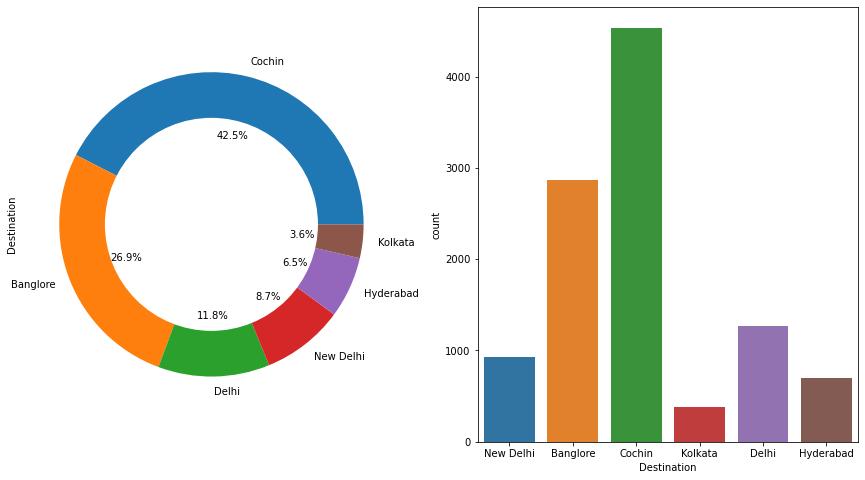

In [248]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
### use '%1.1f%%' to represent values in %..
categorical['Destination'].value_counts().plot.pie(autopct='%1.1f%%')

### lets make a donut chart to make it more cool ,
### plt.Circle((circles centre , radius ,facecolor='white')
centre=plt.Circle((0,0),0.7,fc='white')

### now we have to map this circle on top of my pie chart
### so very first access our figure , to access figure we have to use plt.gcf()

fig=plt.gcf()

### to add this circle on top of my pie , very first we have to get our current axes
### so to get axis , I will say as plt.gca()
### now we have to call fig.gca().add_artist(centre) to add my circle on top of my pie chart..
fig.gca().add_artist(centre)

plt.subplot(1,2,2)
sns.countplot(x='Destination',data=categorical)


In [249]:
'''
Final destination of majority of flights is Cochin. There are two values for Delhi destination which needs to be corrected,

'''

'\nFinal destination of majority of flights is Cochin. There are two values for Delhi destination which needs to be corrected,\n\n'

In [250]:
### Similarly u can do for source , airlines , total stops feature

<AxesSubplot:xlabel='Airline', ylabel='Price'>

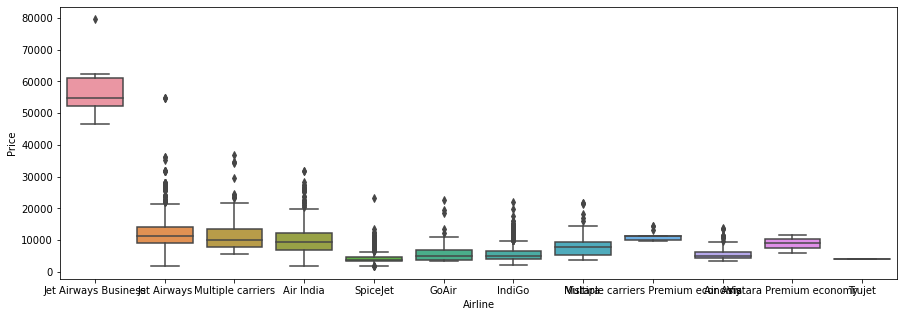

In [251]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Airline',data=data.sort_values('Price',ascending=False))

##### Conclusion-->  From graph we can see that Jet Airways Business have the highest Price., Apart from the first Airline almost all are having similar median

#### Perform Total_Stops vs Price Analysis

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

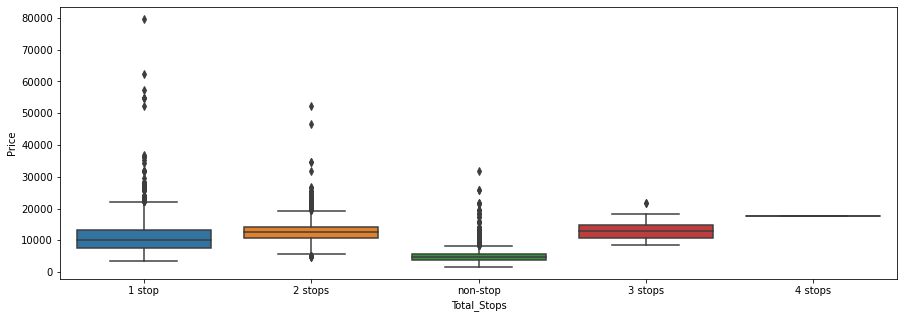

In [252]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Total_Stops',data=data.sort_values('Price',ascending=False))

### Source vs Price

<Figure size 1080x360 with 0 Axes>

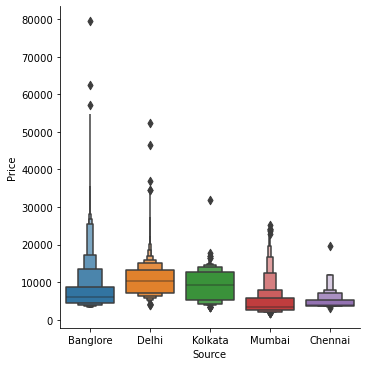

In [253]:
plt.figure(figsize=(15,5))
sns.catplot(y='Price',x='Source',data=data.sort_values('Price',ascending=False),kind='boxen')

In [254]:
### simialrly destination vs price as well..
### airline & duration_mins as well...
### source & duration_mins as well...
### destination & duration_mins as well...
### total_stops & duration_mins as well...

### Duration_total_mins vs Price

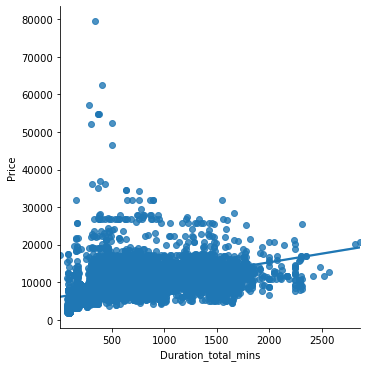

In [255]:
#### It Plot data and regression model fits across a FacetGrid.
#### its a extended form of scatter plot..

sns.lmplot(x='Duration_total_mins',y='Price',data=data)


### pretty clear that As the duration of minutes increases Flight price also increases.

### Univariate Analysis

### for more analysis..

In [256]:
#### analysing distribution of price..

<AxesSubplot:xlabel='Price', ylabel='Count'>

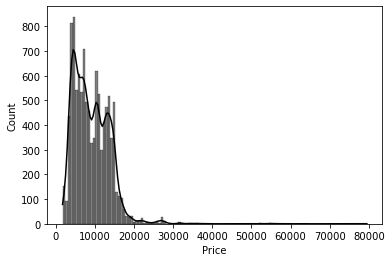

In [257]:
sns.histplot(data['Price'],kde=True,color='k')

<AxesSubplot:xlabel='Duration_total_mins', ylabel='Count'>

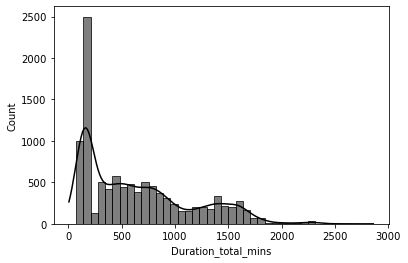

In [258]:
sns.histplot(data['Duration_total_mins'],kde=True,color='k')

### most of the flights have duration less than 200 mins

In [259]:
### getting a descriptive stats of duration feature...

for i in range(10,101,10):
    print('{}th percentile value is:'.format(i))
    print(np.percentile(data['Duration_total_mins'],i))
    print('\n')

10th percentile value is:
145.0


20th percentile value is:
166.00000000000136


30th percentile value is:
180.0


40th percentile value is:
365.0


50th percentile value is:
520.0


60th percentile value is:
675.0


70th percentile value is:
835.0


80th percentile value is:
1125.0


90th percentile value is:
1455.0


100th percentile value is:
2860.0




### lets perform multivariate analysis..
### in this  , basicall our 3 features involved..

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

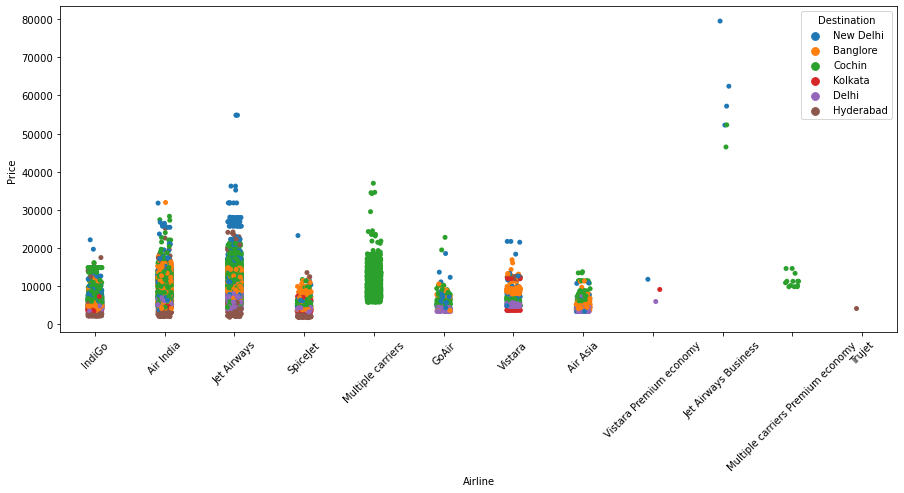

In [353]:
### to show case all the data points in your graph, use stripplot ..

plt.figure(figsize=(15,6))
sns.stripplot(x='Airline',y='Price',hue='Destination',data=data)
plt.xticks(rotation=45)

In [ ]:
#### Simlarly ,, Airline Price & Source..
#### Simlarly ,, Airline Price & total_stops

#### Simlarly ,, Source Price & Destination
#### Simlarly ,, Source Price &

<AxesSubplot:xlabel='Duration_mins', ylabel='Price'>

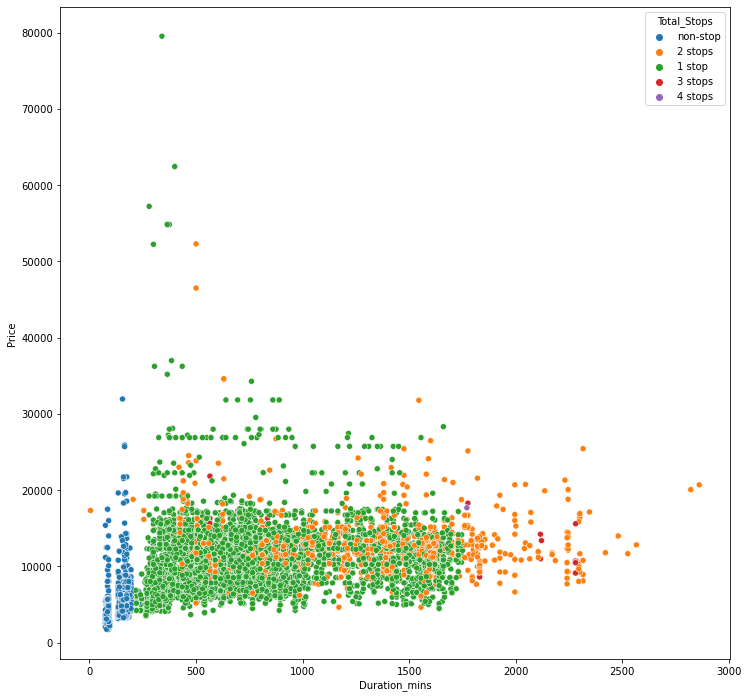

In [354]:
plt.figure(figsize=(12,12))
sns.scatterplot(x='Duration_mins',y='Price',hue='Total_Stops',data=data)

In [ ]:
'''
Non stops flights take less duration while their fare is also low, then as the stop increases, 
duration also increases and price also increases,

'''

In [ ]:
#### Simlarly ,, duration_mins ,Price & Airline..

In [112]:
### pd.get_dummies(train_data['Airline'],drop_first=True,prefix='Airline')

### Handling Categorical Data
    We are using 2 main Encoding Techniques to convert Categorical data into some numerical format
    Nominal data --> data are not in any order --> OneHotEncoder is used in this case
    Ordinal data --> data are in order -->       LabelEncoder is used in this case

#### since airline is a nominal feature , so lets apply onehot encoder on top of this..


#### There are multiple ways to perform onehot encoding ,
    a)Using pandas (pd.get_dummies)

    b)using sklearn (OneHotEncoder) that is available in sub-module of pre-processing
      from sklearn.preprocessing import OneHotEncoder

    c)using sklearn (Dictvectorizer) that is available inside feature_extraction sub-module
      from sklearn.feature_extraction import DictVectorizer

    d) using sklearn's LabelBinarizer 
      from sklearn.preprocessing import LabelBinarizer 

    e) using One Hot Encode with Keras
      The Keras library offers a function called to_categorical() that you can use to one hot encode integer data.
      from keras.utils import to_categorical

    On numerical data--
    a)Using numpy.eye and array element selection mechanism
    b)doing manually


    on string data like 'hello world'
    a)Doing manually
    
    
    
    U can expect such questions in your interview rounds like can u perform one-hot on this feature without using get_
    dummies function
    
    How to perform on-hot on a string..
    So these are the most popular interview questions that u face in top-notch product product companies
     
     So I will give u this problem statement as a assignment , & later-on we will try to solve it in a layman way..

In [113]:
def feature_encoding(df,feature,encoding_type=None):
    if encoding_type=='Onehot':
        return pd.get_dummies(df[feature],drop_first=True,prefix=feature)
    
    

In [114]:
data['Airline'].nunique()

12

In [115]:
### find unique flights so that there must not be a duplicacy
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [116]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

In [117]:
pd.get_dummies(data['Airline'], prefix='Airline', drop_first=True)

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


In [118]:
#now extract how many categories in each cat_feature
for feature in categorical.columns:
    print('{} has total {} categories \n'.format(feature,len(categorical[feature].value_counts())))

Airline has total 12 categories 

Source has total 5 categories 

Destination has total 6 categories 

Total_Stops has total 5 categories 

Route_1 has total 5 categories 

Route_2 has total 45 categories 

Route_3 has total 30 categories 

Route_4 has total 14 categories 



In [119]:

### Now on 3 features , Airline Source & Destination , we can apply on-hot as there is no such order
### but total_stops is my ordinal data , so we can not apply on-hot on top of this..
### similarly on Route_2  , Route_3 & route_4  , it is not good to apply one-hot as it will create curse of dimensionality issue
### which leads to usage of more resources of your pc..

### So we can think for appplying Label Encoding or better techniques like Target Guided Ordinal Encoding


In [120]:
data2=data.copy()

In [121]:
### So instead of applying one-hot again & again on Airline Source & Destination
### lets create a function , that will do all these tasks for us

In [122]:
def one_hot(df, list_of_cols):
    """
    @parameters 
    @df = pandas DataFrame
    @list_of_cols = a list of columns to encode 
    """
    for col in list_of_cols:
        dummies = pd.get_dummies(df[col], prefix=col, drop_first=True)
        df.drop(col,axis=1,inplace=True)
        df = pd.concat([df, dummies], axis=1)
    return df
        

In [123]:
### lets Find out unique sub categories that we do not duplicacy in a feature

In [124]:
def return_unique_features(df,list_of_cols):
    for col in list_of_cols:
        print('feature is : {}'.format(col))
        print(df[col].value_counts())
        print('\n')

In [125]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Journey_year', 'Arrival_Time_hours',
       'Arrival_Time_minutes', 'Dep_Time_hours', 'Dep_Time_minutes',
       'Duration_hours', 'Duration_mins', 'Duration_sec', 'Route_1', 'Route_2',
       'Route_3', 'Route_4'],
      dtype='object')

In [126]:
return_unique_features(data,list_of_cols=['Airline', 'Source', 'Destination'])

feature is : Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


feature is : Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


feature is : Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64




In [127]:
data['Destination'].replace('New Delhi','Delhi',inplace=True)

In [128]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [129]:
### now lets perform one-hot encoding on these 3 features list_of_cols=['Airline', 'Source', 'Destination']

In [130]:
data_train=one_hot(data,list_of_cols=['Airline', 'Source', 'Destination'])

In [131]:
data_train

,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hours,Arrival_Time_minutes,Dep_Time_hours,Dep_Time_minutes,Duration_hours,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,non-stop,3897,24,3,2019,1,10,22,20,2,...,0,0,0,0,0,0,0,1,0,0
1,2 stops,7662,5,1,2019,13,15,5,50,7,...,0,0,0,0,1,0,0,0,0,0
2,2 stops,13882,6,9,2019,4,25,9,25,19,...,0,0,0,1,0,0,1,0,0,0
3,1 stop,6218,5,12,2019,23,30,18,5,5,...,0,0,0,0,1,0,0,0,0,0
4,1 stop,13302,3,1,2019,21,35,16,50,4,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,non-stop,4107,4,9,2019,22,25,19,55,2,...,0,0,0,0,1,0,0,0,0,0
10679,non-stop,4145,27,4,2019,23,20,20,45,2,...,0,0,0,0,1,0,0,0,0,0
10680,non-stop,7229,27,4,2019,11,20,8,20,3,...,0,0,0,0,0,0,0,1,0,0
10681,non-stop,12648,3,1,2019,14,10,11,30,2,...,1,0,0,0,0,0,0,1,0,0


In [132]:
data_train.dtypes

Total_Stops                                  object
Price                                         int64
Journey_day                                   int64
Journey_month                                 int64
Journey_year                                  int64
Arrival_Time_hours                            int64
Arrival_Time_minutes                          int64
Dep_Time_hours                                int64
Dep_Time_minutes                              int64
Duration_hours                                int64
Duration_mins                                 int64
Duration_sec                                  int64
Route_1                                      object
Route_2                                      object
Route_3                                      object
Route_4                                      object
Airline_Air India                             uint8
Airline_GoAir                                 uint8
Airline_IndiGo                                uint8
Airline_Jet 

## understanding the various data-types

In [134]:
### as we will see we have lots of features in Route , one hot encoding will not be a better option as it will create curse of dimensionality

### lets appply Label Encoding or better techniques like Target Guided Ordinal Encoding


### Target Guided Ordinal Encoding

In [ ]:
'''
Ok,now one thing I know is the price varies according to route,
depending on the number of stops(also depending on where your flight has an hault),
instead of label encoding,we will use better encoding lets say target guided ordinal encoding..

'''

In [135]:
### instead of directly replacing sub-categories with labels as 1 , 2 , 3 or etc

### lets improve this..

### so what I will say is-- whichever sub-category has highest avg price  , assign higher priority to that
### & thats what my Target Guided Ordinal Encoding stands for 



###but imagine we have lots of outliers in a feature,in such case median would be handy bcz median will not affected by outliers

In [136]:
data.groupby(['Route_1'])['Price'].median().sort_values(ascending=False)

Route_1
DEL     10262
CCU      9345
BLR      6121
MAA      3850
BOM      3342
Name: Price, dtype: int64

In [137]:
data.groupby(['Route_1'])['Price'].mean().sort_values(ascending=False)

Route_1
DEL     10540.113536
CCU      9158.389411
BLR      8017.464269
BOM      5059.708752
MAA      4789.892388
Name: Price, dtype: float64

In [138]:
labels=data.groupby(['Route_1'])['Price'].median().sort_values(ascending=False).index
labels

Index(['DEL ', 'CCU ', 'BLR ', 'MAA ', 'BOM '], dtype='object', name='Route_1')

In [139]:
labels=data.groupby(['Route_1'])['Price'].mean().sort_values(ascending=False).index
labels

Index(['DEL ', 'CCU ', 'BLR ', 'BOM ', 'MAA '], dtype='object', name='Route_1')

In [140]:
route1={k:i for i,k in enumerate(labels,0)}
route1

{'DEL ': 0, 'CCU ': 1, 'BLR ': 2, 'BOM ': 3, 'MAA ': 4}

In [141]:
### Alternate of enumerate 
route1={}
for i in range(len(labels)):
    route1[labels[i]]=i
    ### route1.update({labels[i]:i})

In [142]:
data_train['Route_1']=data_train['Route_1'].map(route1)
data_train['Route_1']

0        2
1        1
2        0
3        1
4        2
        ..
10678    1
10679    1
10680    2
10681    2
10682    0
Name: Route_1, Length: 10682, dtype: int64

### Lets Automate above stufffs

In [143]:
def target_guided_encoding(df,feature,target_column=None):

    labels=df.groupby([feature])[target_column].mean().sort_values(ascending=False).index
    route={k:i for i,k in enumerate(labels,0)}
    df[feature]=df[feature].map(route)
    

In [144]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Journey_year',
       'Arrival_Time_hours', 'Arrival_Time_minutes', 'Dep_Time_hours',
       'Dep_Time_minutes', 'Duration_hours', 'Duration_mins', 'Duration_sec',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata'],
      dtype='object')

In [145]:
for feature in ['Route_2','Route_3','Route_4']:
    target_guided_encoding(df=data_train,feature=feature,target_column='Price')

In [146]:
data_train.head(2)

,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hours,Arrival_Time_minutes,Dep_Time_hours,Dep_Time_minutes,Duration_hours,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,non-stop,3897,24,3,2019,1,10,22,20,2,...,0,0,0,0,0,0,0,1,0,0
1,2 stops,7662,5,1,2019,13,15,5,50,7,...,0,0,0,0,1,0,0,0,0,0


In [147]:
### below code is for Label Ecoding on ['Route_2','Route_3','Route_4']

### Quiz question -->> What is Label Encoding & should we consider this in this use-case??

In [148]:
'''
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4','Route_5']:
    categorical[i]=encoder.fit_transform(categorical[i])
    
 '''   

"\nfrom sklearn.preprocessing import LabelEncoder\nencoder=LabelEncoder()\nfor i in ['Route_1', 'Route_2', 'Route_3', 'Route_4','Route_5']:\n    categorical[i]=encoder.fit_transform(categorical[i])\n    \n "

In [149]:
data_train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [150]:
data_train['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [151]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding key

stop={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}


'''
### Alternative , imagine recriter hey can u do it using other ways ,
So I way ofcourse I will just define a function & apply it on top of my feature..

def convert_into_stops(X):
    if X == '4 stops':
        return 4
    elif X == '3 stops':
        return 3
    elif X == '2 stops':
        return 2
    elif X == '1 stop':
        return 1
    elif X == 'non stop':
        return 0
data_train['Total_Stops'] = data_train['Total_Stops'].map(convert_into_stops)


'''

"\n### Alternative , imagine recriter hey can u do it using other ways ,\nSo I way ofcourse I will just define a function & apply it on top of my feature..\n\ndef convert_into_stops(X):\n    if X == '4 stops':\n        return 4\n    elif X == '3 stops':\n        return 3\n    elif X == '2 stops':\n        return 2\n    elif X == '1 stop':\n        return 1\n    elif X == 'non stop':\n        return 0\ndata_train['Total_Stops'] = data_train['Total_Stops'].map(convert_into_stops)\n\n\n"

In [152]:
### Quiz question-->> but what if we have imagine 100 sub-categories in Total_stops feature , 
### so above one will not be efficient bcz u have to tonnes of if-else block...

### u can use below one..

In [153]:
stop2={}
for index,stop in enumerate(data_train['Total_Stops'].unique(),0):
    ## stop2[key]=value
    stop2[stop]=index

In [154]:
stop2

{'non-stop': 0, '2 stops': 1, '1 stop': 2, '3 stops': 3, '4 stops': 4}

In [155]:
data_train['Total_Stops'].isnull().sum()

0

In [156]:
data_train['Total_Stops']=data_train['Total_Stops'].map(stop2)

In [157]:
data_train.head(2)

,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hours,Arrival_Time_minutes,Dep_Time_hours,Dep_Time_minutes,Duration_hours,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,3897,24,3,2019,1,10,22,20,2,...,0,0,0,0,0,0,0,1,0,0
1,1,7662,5,1,2019,13,15,5,50,7,...,0,0,0,0,1,0,0,0,0,0


In [158]:
data_train.dtypes

Total_Stops                                  int64
Price                                        int64
Journey_day                                  int64
Journey_month                                int64
Journey_year                                 int64
Arrival_Time_hours                           int64
Arrival_Time_minutes                         int64
Dep_Time_hours                               int64
Dep_Time_minutes                             int64
Duration_hours                               int64
Duration_mins                                int64
Duration_sec                                 int64
Route_1                                      int64
Route_2                                      int64
Route_3                                      int64
Route_4                                      int64
Airline_Air India                            uint8
Airline_GoAir                                uint8
Airline_IndiGo                               uint8
Airline_Jet Airways            

In [159]:
data_train.shape

(10682, 35)

In [160]:
pd.set_option('display.max_columns',35)

In [161]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hours,Arrival_Time_minutes,Dep_Time_hours,Dep_Time_minutes,Duration_hours,Duration_mins,Duration_sec,Route_1,Route_2,Route_3,Route_4,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,3897,24,3,2019,1,10,22,20,2,170,612000,2,40,29,13,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,7662,5,1,2019,13,15,5,50,7,445,1602000,1,25,26,11,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,13882,6,9,2019,4,25,9,25,19,1140,4104000,0,20,13,9,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,2,6218,5,12,2019,23,30,18,5,5,325,1170000,1,18,23,13,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,2,13302,3,1,2019,21,35,16,50,4,285,1026000,2,18,7,13,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### outlier detection

#### Here the list of data visualization plots to spot the outliers.
    1. Box and whisker plot (box plot).
    2. Scatter plot.
    3. Histogram.
    4. Distribution Plot.
    5. QQ plot.

### Discussion Related With Outliers And Impact On Machine Learning!!
    If u dont have domain knowledge,u may probably deal with outliers, but still there are some of ML algos that performs 
    well to outliers

    Which Machine LEarning Models Are Sensitive To Outliers?
    Naivye Bayes Classifier--- Robust To Outliers

    SVM-------- Robust To Outliers

    Mathematical formual of SVM doesnt get affected by outliers
    Linear Regression---------- Impacted by Outliers

    Logistic Regression------- Impacted by Outliers

    Decision Tree Regressor or Classifier---- Robust To Outliers

    Ensemble Techniques(Random Forest,XGboost,GB)------- Robust To Outliers

    KNN--------------------------- Robust To Outliers

     KNN is basically using K value  that why it is not impacted by outliers
    Kmeans------------------------ Impacted by Outliers

     KMeans is basically using Euclidean Distance thats why it gets impacted
    Hierarichal------------------- Impacted by Outliers

    PCA,LDA-------------------------- Impacted by Outliers

    Neural Networks-------------- Impacted by Outliers

    Note in Each and every case It is not necessary to deal with outliers,it will entirely depend on our problem statement
    Suppose in Fraud credit card detection,we dont have to deal with outliers,we have to use that ML algo that performs well to outliers

    Suppose a spike in sales foercasting ,in such case we have to keep these important spike values bcz these are my important values

In [162]:
#### it makes no sense to consider qq(Quantile quantile) plot bcz price is not normally distributed feature..

In [163]:
import statsmodels.api as sm 
def plot(df,col):
    
    fig,(ax1,ax2,ax3)=plt.subplots(3,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)
    sns.distplot(df[col],ax=ax3,kde=False)
    

<Figure size 2160x1440 with 0 Axes>

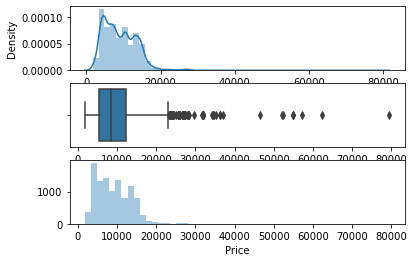

In [164]:
plt.figure(figsize=(30,20))
plot(data_train,'Price')

### getting a high level over-view of various ways to deal with outliers:
    Again there are various ways to deal with outliers :
    Follow Outliers.ipynb in Entire_data_science & folder of outlier_detection..
    
    
    1..Statistical imputation , ie impute it with mean , median or mode of data..
    
    a..Whenever ur data is Gaussian Distributed ,use 3 std dev approach to remove outliers in such case
         ie we will use u+3*sigma & u-3*sigma
            data pts greater than upper_boundary( u+3*sigma) are my outliers 
                & data pts which are less than lower_boundary(u-3*sigma) are my outliers
                
            Above approach is known as Z-score & it has a extended version known as Robust z-score..
            Robust Z-score is also called as Median absolute deviation method. 
            It is similar to Z-score method with some changes in parameters.
            
            
    b..If Features Are Skewed We Use the below Technique which is IQR
        Data which are greater than IQR +1.5 IQR and data which are below than IQR - 1.5 IQR are my outliers
         where IQR=75th%ile data - 25th%ile data
         
         & IQR +- 1.5 IQR  will be changed depending upon the domain ie IQR + 3IQR 
          
          
           Extended version of above is WINSORIZATION METHOD(PERCENTILE CAPPING)..
           This method is similar to IQR method. It says -->> 
           
           Data points that are greater than 99th percentile and data points that are below tha 1st percentile 
           are treated as outliers.
         
         
         
     c..If we have huge high dimensional data , then it is good to perform isolation forest...
         It is a clustering algo which works based on decision tree and it isolate the outliers.
         It classify the data point to outlier and not outliers..
             If the result is -1, it means that this specific data point is an outlier. 
             If the result is 1, then it means that the data point is not an outlier.

       
       
       
    d. DBSCAN (DENSITY-BASED SPATIAL CLUSTERING OF APPLICATIONS WITH NOISE)
        Which is pretty much similar with k-means 
        
        
        
        
    e..we have some statistical tests to detect whether we have some outliers in my data or not.. often termed as 
       Grubbs Test
       
       
       
    So we have tonnes of ways to deal with outliers..
       

In [165]:
#### for outliers
'''

def outlier(df):
    for i in df.describe().columns:
        Q1=df.describe().at['25%',i]
        Q3=df.describe().at['75%',i]
        IQR= Q3-Q1
        LE=Q1-1.5*IQR
        UE=Q3+1.5*IQR
        df[i]=df[i].mask(df[i]<LE,LE)
        df[i]=df[i].mask(df[i]>UE,UE)
    return df

'''

#### follow notebooks-->> https://www.kaggle.com/harikrishna9/how-to-predict-flight-ticket-price

"\n\ndef outlier(df):\n    for i in df.describe().columns:\n        Q1=df.describe().at['25%',i]\n        Q3=df.describe().at['75%',i]\n        IQR= Q3-Q1\n        LE=Q1-1.5*IQR\n        UE=Q3+1.5*IQR\n        df[i]=df[i].mask(df[i]<LE,LE)\n        df[i]=df[i].mask(df[i]>UE,UE)\n    return df\n\n"

#### dealing with Outliers

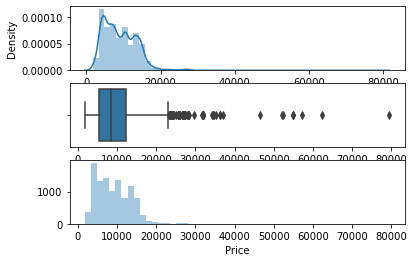

In [166]:
plot(data_train,'Price')

In [167]:
q1 = data_train['Price'].quantile(0.25)
q3 = data_train['Price'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 3 * iqr
print(Lower_tail)
Upper_tail = q3 + 3 * iqr
print(Upper_tail)

-16011.0
33661.0


In [168]:
outliers=[]
for price in data_train['Price']:
    if price > Upper_tail or price < Lower_tail:
            outliers.append(price)
        
#### optimal way

### [price for price in data_train['Price'] if price > Upper_tail or price < Lower_tail]

In [169]:
len(outliers)

16

In [170]:
print(outliers)

[36983, 52229, 54826, 36235, 54826, 35185, 79512, 62427, 54826, 36235, 34273, 46490, 34503, 34608, 52285, 57209]


In [171]:
min(outliers)

34273

In [172]:
### wherever I have price >35K just replace replace it with median of Price

data_train['Price']=np.where(data_train['Price']>=35000,data_train['Price'].median(),data_train['Price'])

<Figure size 2160x1440 with 0 Axes>

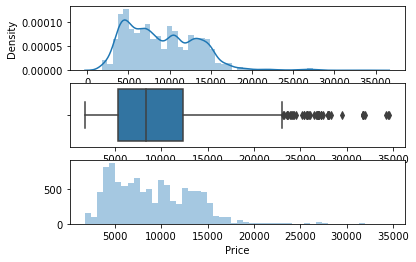

In [173]:
plt.figure(figsize=(30,20))
plot(data_train,'Price')

### getting a high level over-view of various ways to deal with outliers:
    Again there are various ways to deal with outliers :
    Follow Outliers.ipynb in Entire_data_science & folder of outlier_detection..


    1..Statistical imputation , ie impute it with mean , median or mode of data..

    a..Whenever ur data is Gaussian Distributed ,use 3 std dev approach to remove outliers in such case
         ie we will use u+3*sigma & u-3*sigma
            data pts greater than upper_boundary( u+3*sigma) are my outliers 
                & data pts which are less than lower_boundary(u-3*sigma) are my outliers

            Above approach is known as Z-score & it has a extended version known as Robust z-score..
            Robust Z-score is also called as Median absolute deviation method. 
            It is similar to Z-score method with some changes in parameters.


    b..If Features Are Skewed We Use the below Technique which is IQR
        Data which are greater than IQR +1.5 IQR and data which are below than IQR - 1.5 IQR are my outliers
         where IQR=75th%ile data - 25th%ile data

         & IQR +- 1.5 IQR  will be changed depending upon the domain ie IQR + 3IQR 


           Extended version of above is WINSORIZATION METHOD(PERCENTILE CAPPING)..
           This method is similar to IQR method. It says -->> 

           Data points that are greater than 99th percentile and data points that are below tha 1st percentile 
           are treated as outliers.



     c..If we have huge high dimensional data , then it is good to perform isolation forest...
         It is a clustering algo which works based on decision tree and it isolate the outliers.
         It classify the data point to outlier and not outliers..
             If the result is -1, it means that this specific data point is an outlier. 
             If the result is 1, then it means that the data point is not an outlier.




    d. DBSCAN (DENSITY-BASED SPATIAL CLUSTERING OF APPLICATIONS WITH NOISE)
        Which is pretty much similar with k-means 




    e..we have some statistical tests to detect whether we have some outliers in my data or not.. often termed as 
       Grubbs Test



    So we have tonnes of ways to deal with outliers..

In [ ]:
#### for outliers
'''

def outlier(df):
    for i in df.describe().columns:
        Q1=df.describe().at['25%',i]
        Q3=df.describe().at['75%',i]
        IQR= Q3-Q1
        LE=Q1-1.5*IQR
        UE=Q3+1.5*IQR
        df[i]=df[i].mask(df[i]<LE,LE)
        df[i]=df[i].mask(df[i]>UE,UE)
    return df

'''

#### follow notebooks-->> https://www.kaggle.com/harikrishna9/how-to-predict-flight-ticket-price

### dealing with Outliers

In [ ]:
plot(data_train,'Price')

In [ ]:
q1 = data_train['Price'].quantile(0.25)
q3 = data_train['Price'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 3 * iqr
print(Lower_tail)
Upper_tail = q3 + 3 * iqr
print(Upper_tail)

In [ ]:
outliers=[]
for price in data_train['Price']:
    if price > Upper_tail or price < Lower_tail:
            outliers.append(price)
        
#### optimal way

### [price for price in data_train['Price'] if price > Upper_tail or price < Lower_tail]

In [ ]:
len(outliers)

In [ ]:
print(outliers)

In [ ]:
min(outliers)

In [ ]:
### wherever I have price >35K just replace replace it with median of Price

data_train['Price']=np.where(data_train['Price']>=35000,data_train['Price'].median(),data_train['Price'])

In [ ]:
plt.figure(figsize=(30,20))
plot(data_train,'Price')

In [174]:
### separate your independent & dependent data

In [175]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Journey_year',
       'Arrival_Time_hours', 'Arrival_Time_minutes', 'Dep_Time_hours',
       'Dep_Time_minutes', 'Duration_hours', 'Duration_mins', 'Duration_sec',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata'],
      dtype='object')

In [176]:
ind_features=[feature for feature in data_train.columns if feature not in ['Price','Duration_mins','Duration_sec']]
print(ind_features)

['Total_Stops', 'Journey_day', 'Journey_month', 'Journey_year', 'Arrival_Time_hours', 'Arrival_Time_minutes', 'Dep_Time_hours', 'Dep_Time_minutes', 'Duration_hours', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business', 'Airline_Multiple carriers', 'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet', 'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata']


In [177]:
len(ind_features)

32

In [178]:
X=data_train[ind_features]

### data_train.drop(['Price','Duration_mins','Duration_sec'],axis=1)

In [179]:
X.shape

(10682, 32)

In [180]:
y=data_train['Price']
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

In [181]:
##type(X)

In [182]:
##type(y)

In [183]:
##X.isnull().sum()

In [184]:
##y.isnull().sum()

In [185]:
#### as now we dont have any missing value in data, we can definitely go ahead with Feature Selection

### Feature Selection
    Finding out the best feature which will contribute and have good relation with target variable. 
    Lets get a high level overview of most of the frequently used feature selection technique..
    Bcz If I start covering each algo of feature selection , it takes 10 + hours to finish it..
    
    
### Why to apply Feature Selection?
    To select important features to get rid of curse of dimensionality ie..to get rid of duplicate features
    
    ways or technqiues to do it if we have regression use-case
    a..SelectKBest
        Score function:
        For regression: f_regression, mutual_info_regression
        
        f_regression
        Its backbone is pearson co-relation.. 
        
        
       mutual_info_regression-->> 
       before getting into this,very first u have to make sure u knows various statistical test like Chi-sq,Anova & p-value.
        
        
    b..ExtraTreesClassifier
       This technique gives you a score for each feature of your data,the higher the score more relevant it is
   
    
    d..SelectFromModel
    
    
    
    
    2..If we have a classification use-case
       we have score func. as chi2, f_classif, mutual_info_classif(uses information gain concept internally)
    
    

#### we have in-built feature selection methods to determine importance of feature..
#### Link-->> https://www.kaggle.com/harikrishna9/how-to-predict-flight-ticket-price

In [186]:
###np.array(X)

In [187]:
##np.array(y)

### I wanted to find mutual information scores or matrix to get to know about the relationship between all features.

####  Feature Selection using Information Gain,

In [188]:
from sklearn.feature_selection import mutual_info_classif

In [189]:
## mutual_info_classif()

In [190]:
###mutual_info_classif(np.array(X),np.array(y))

In [191]:
X.dtypes

Total_Stops                                  int64
Journey_day                                  int64
Journey_month                                int64
Journey_year                                 int64
Arrival_Time_hours                           int64
Arrival_Time_minutes                         int64
Dep_Time_hours                               int64
Dep_Time_minutes                             int64
Duration_hours                               int64
Route_1                                      int64
Route_2                                      int64
Route_3                                      int64
Route_4                                      int64
Airline_Air India                            uint8
Airline_GoAir                                uint8
Airline_IndiGo                               uint8
Airline_Jet Airways                          uint8
Airline_Jet Airways Business                 uint8
Airline_Multiple carriers                    uint8
Airline_Multiple carriers Premi

In [192]:
### Check for Duplicate Feature Names (if any) prior to running algorithms
### if we have some duplicate features, we need to handle them

X.columns[X.columns.duplicated()]

Index([], dtype='object')

In [193]:
mutual_info_classif(X,y)

array([2.16425368e+00, 1.09264731e+00, 8.69437334e-01, 1.49024115e+00,
       1.83717055e+00, 1.51669784e+00, 1.43941695e+00, 1.23616465e+00,
       1.77744095e+00, 1.84646463e+00, 2.90819802e+00, 2.42329812e+00,
       1.47498068e+00, 7.78203403e-01, 8.48325584e-02, 6.61051610e-01,
       9.33085335e-01, 1.88107567e-04, 5.64486037e-01, 1.11353276e-02,
       3.25674372e-01, 9.23103505e-03, 2.08249473e-01, 2.61762352e-03,
       1.69020843e-01, 1.54574599e+00, 8.74965863e-01, 2.80602702e-01,
       1.56932927e+00, 7.14852791e-01, 2.93525578e-01, 1.88985218e-01])

In [194]:
imp=pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
imp

,0
Total_Stops,2.116018
Journey_day,1.095982
Journey_month,0.847815
Journey_year,1.449829
Arrival_Time_hours,1.856001
Arrival_Time_minutes,1.542618
Dep_Time_hours,1.437417
Dep_Time_minutes,1.196385
Duration_hours,1.802954
Route_1,1.861528


In [195]:
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

,importance
Route_2,2.913910
Route_3,2.489571
Total_Stops,2.116018
Route_1,1.861528
Arrival_Time_hours,1.856001
Duration_hours,1.802954
Source_Delhi,1.557993
Arrival_Time_minutes,1.542618
Destination_Cochin,1.541958
Route_4,1.536728
